In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('glass.csv')
data.head()

In [ ]:
data.info()

In [ ]:
data['Type'].value_counts()

In [ ]:
# Looking that sum of different elements sum upto 100. 
# Understanding that one type of glass corresponds to the different compositions of elements
# Refractive Index = the ratio of the speed of light in a vacuum to the ratio of the speed of light in a specific medium (glass)
data.iloc[:,1:-1].sum(axis=1).astype('int').value_counts()

In [ ]:
## Separating X and y variables
X = data.iloc[:, :-1]
#X.head()

y = data.iloc[: , -1]
#y.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

params = dict(n_neighbors = np.array(range(1, 40)))
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid= params, cv =5)

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score)


In [ ]:
grid.scorer_

In [ ]:
# Defining the param grid for k - 1 to 31
grid = range(1,31)
grid_cv = {}

for k in grid:
    model = KNeighborsClassifier(n_neighbors=k)
    # using cv = 5 ( K-fold) to calculate 10 scores for each value of k.
    scores = cross_val_score(model, X, y, cv =5, scoring='f1_weighted')
    result = scores.mean()
    error = 1-result
    # storing the scores for each value of k in a dictionary
    grid_cv.update({k:(result,error)})
    

In [ ]:
# df = pd.DataFrame(grid_cv, index=['scores']).T
# df.sort_values(['scores'], ascending=False)

In [ ]:
grid_cv

df_new = pd.DataFrame(grid_cv, index=['score','error']).T
df_new

In [ ]:
df_new.sort_values(['score'],ascending=False)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_new.index, df_new['error'])
plt.show()

### Trying with train and test splitting method

In [98]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=45)

model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.56      0.83      0.67        18
           2       0.69      0.58      0.63        19
           3       0.00      0.00      0.00         4
           5       0.60      1.00      0.75         3
           6       0.50      0.50      0.50         2
           7       1.00      0.50      0.67         8

    accuracy                           0.63        54
   macro avg       0.56      0.57      0.54        54
weighted avg       0.63      0.63      0.60        54



C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ridaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
test_sample = X_train.head(1)
#y_sample = model1.predict(test_sample)
model1.kneighbors(test_sample)[0]

array([[0.        , 0.2412468 , 0.32480767, 0.35000036, 0.43046487]])

In [99]:
y_test.value_counts()

2    19
1    18
7     8
3     4
5     3
6     2
Name: Type, dtype: int64

In [107]:
from sklearn.metrics import f1_score, classification_report
k_metrics = {}

In [121]:
def Elbow(K):
    for i in K:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)    
        f1 = f1_score(y_predict, y_test, average='weighted')
        error = 1-f1
        k_metrics.update({i:(f1, error)})        
    return k_metrics


In [122]:
n_neigh = np.array(range(1, 31))
results = Elbow(n_neigh)
results

{1: (0.7329651877455495, 0.26703481225445047),
 2: (0.6884353741496598, 0.31156462585034017),
 3: (0.5976774116308999, 0.40232258836910006),
 4: (0.6226366226366227, 0.37736337736337733),
 5: (0.6569223985890653, 0.3430776014109347),
 6: (0.5849842516509183, 0.4150157483490817),
 7: (0.5774373913908798, 0.4225626086091202),
 8: (0.5890804425688146, 0.41091955743118536),
 9: (0.5866060866060866, 0.4133939133939134),
 10: (0.5885461218794552, 0.4114538781205448),
 11: (0.5675854148722366, 0.43241458512776343),
 12: (0.6049569771791995, 0.3950430228208005),
 13: (0.59325992659326, 0.40674007340674),
 14: (0.6096707818930042, 0.39032921810699583),
 15: (0.6077589217124101, 0.3922410782875899),
 16: (0.6077589217124101, 0.3922410782875899),
 17: (0.572099372099372, 0.427900627900628),
 18: (0.572099372099372, 0.427900627900628),
 19: (0.5709876543209876, 0.42901234567901236),
 20: (0.5889389389389389, 0.4110610610610611),
 21: (0.59006734006734, 0.40993265993266004),
 22: (0.588938938938938

In [123]:
df_2 = pd.DataFrame(results, index=['score', 'error']).T
df_2

,score,error
1,0.732965,0.267035
2,0.688435,0.311565
3,0.597677,0.402323
4,0.622637,0.377363
5,0.656922,0.343078
6,0.584984,0.415016
7,0.577437,0.422563
8,0.589080,0.410920
9,0.586606,0.413394
10,0.588546,0.411454


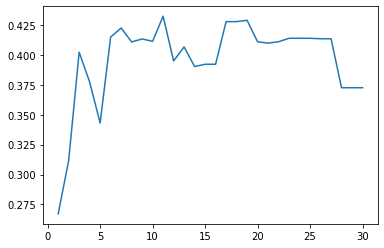

In [125]:
plt.plot(df_2.index, df_2['error'])
plt.show()

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=1)
final_model.fit(X, y)


In [ ]:
y_pred = final_model.predict(X)

In [ ]:
final_model.kneighbors(X.iloc[0])

In [ ]:
data.describe()

In [ ]:
from sklearn.metrics import accuracy_score


In [67]:
accuracy_score(y_pred, y)

1.0